# Análisis del riesgo de incumplimiento de los prestatarios



# Contents <a id='back'></a>

* [1 Abre el archivo de datos y mira la información general.](#intro)
* [2 Ejercicio 1. Exploración de datos](#data_review)
    * [Conclusión intermedia](#data_review_conclusions)
    * [Posibles razones por las que hay valores ausentes en los datos](data)
    * [Conclusión intermedia](data)
    *  [Conclusiones](data)
* [3 Transformación de datos](#data_preprocessing)
    * [Conclusiones](#header_style)
    * [Trabajar con valores ausentes](#hypotheses)
    * [3.1 Restaurar valores ausentes en total_income](#activity)
    * [3.2 Restaurar valores ausentes en days_employed](#week)
* [4 Clasificación de datos](#end)
* [5 Comprobación de las hipótesis](#end)
    * [¿Existe una correlación entre tener hijos y pagar a tiempo?](#end)
    * [¿Existe una correlación entre la situación familiar y el pago a tiempo?](#end)
    *[¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?](#end)
    *[¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?](#end)
* [Conclusiones Generales](#end)
    
    
    

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> 
    
Gracias que anadiste el plan

## Abre el archivo de datos y mira la información general. 

[Empieza con la importación de las librerías y la carga de los datos. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [ ]:
import pandas as pd
df= pd.read_csv('/datasets/credit_scoring_eng.csv')




## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo



Para explorar nuestros datos, se procederá a ver cuántas columnas y filas tienen e imprimir las
primeras 10 filas para identificar como se encuentra la calidad de los datos y posibles problemas 
con los datos.

In [4]:
print(df.shape)


(21525, 12)


In [5]:

print(df.head(10))


   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  SECONDARY EDUCATION             1   
8         2   -6929.865299         35    BACHELOR'S DEGREE             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

De acuerdo a la muestra de las primeras 10 filas de nuestros datos. Se han detectado problemas en la siguientes columnas: 

-days_employed: A simple vista se interpreta que los datos están erróneos porque están en días negativos lo cual está fuera de contexto. Adicional se observa que en la fila 4 el número de días: 340266.072047 es significativamente imposible porque serían más de 1000 años trabajando para alcanzar ese dato. 

-education: Existen valores que tienen la misma información pero está en diferente formato, es decir están en mayúsculas y minúsculas. Más adeltante se procederá con las correcciones y estandarización del formato para todos los elementos. 
-children: 

-total_income: El formato de los ingresos se encuentra como float, para trabajar con los datos es necesario poder cambiarlo a número entero para tener valores cerrados. 

-purpose: Los registros del propósito de pedir un préstamo son similares pero están registrados de diferente manera. Por ejemplo en la fila 4 y 8 la idea es la mismo: tener su boda, pero el sistema lo lee como si fueran 2 diferentes razones. Es por eso que se necesitaría realizar una agrupación de las celdas que contienen el propósito en común a través de una investigación y conocimiento de los datos ingresados con el fin de reemplazarlos por un valor único en un mismo formato de texto. 

Para obtener un mayor diagnóstico sobre la calidad de los datos con la que vamos a trabajar, vamos a obtener tener la información de la base de datos.

Este paso nos permite identificar si existen valores ausentes/duplicados y comparar el número de filas y columnas que obtuvimos en el paso anterior. 

De igual manera revisar si python está reconociendo el tipo de datos de cada columna de acuerdo al contexto y formato que debería estar ingresado. 



In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


En base a los resultados tenemos un registro total de 21.525 filas y 12 columnas. Por otro lado existe el mismo número de valores ausentes cuantitativos en las 2 únicas columnas: days_employed y total_income. 

Es un punto importante que vamos a evaluar en esta sección si la ausencia de datos está relacionada con las demás variables del conjunto de datos y si existe o no aleatoriedad en los datos para encontrar un patrón. 

Como siguiente paso vamos a filtrar la tabla con los valores ausentes de ambas columnas para ver las características de las demás variables que si tenemos registros y obtener el número total de valores ausentes. 

In [7]:

df[(df['days_employed'].isna())& (df['total_income'].isna())]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


De acuerdo al registro en nuestra tabla filtrada,el número de valores ausentes parece ser simétricos entre ambas columnas, es decir 2174 filas en común.

No podemos estar seguros dado que una suposición porque aplicamos dos filtros o condiciones a la tabla, pero pueden existir más valores ausentes en cada columna. 

Es un punto que vamos a comprobar a continuación a través del método isna() y sum () para contar si el número de filas ausentes en cada columna concide con el dato anterior.  



In [8]:

df[['days_employed', 'total_income']].isna().sum()



days_employed    2174
total_income     2174
dtype: int64

**Conclusión intermedia**



La tabla filtrada indica que para la columna days_employed y total_income tienen el mismo número de filas con valores ausentes, un total de 2.174 registros como NAN. 

Posteriormente se realiza una comprobación con filtros múltiples correspondientes a ambas columnas, con el objetivo de validar si sus valores ausentes son simétricos. Finalmente obtenemos el mismo resultado de 2.174 de valores ausentes, asegurando que el número de filas de la tabla filrada es pareja y simétrica con el número de valores ausentes. 

El porcentaje de valores ausentes representa el 10% del DataFrame y se considera una gran proporción. La naturaleza de este error se pudo deber a errores técnicos y para trabajar con los datos completos será necesario rellenar esos valores ausentes, y adicional ejecutar un análisis sobre si las demás características de los clientes estan relacionados o influyeron en que se obtengan 2.174 registros ausentes.

Una hipótesis puede ser que el tipo de empleo de un cliente pueda ser un factor influyente para que exista valores ausentes en sus ingresos totales. El análisis lo podemos profundizar si combinamos con la variable: family_status para estudiar los perfiles de los clientes.


In [9]:
days_blank = df['days_employed'].isna().sum()
filas_totales = len(df)
porcentaje_valores_ausentes = (days_blank/filas_totales)
print(f'Porcentaje de valores ausentes: {porcentaje_valores_ausentes:.0%}')

Porcentaje de valores ausentes: 10%


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b>
    
Esta sustitución puede generar problemas cuando se vaya a hacer tratamiento. Sugiero que los dejes en formato `NaN` ya que `pandas` los identifica facilmente y trae incorporadas algunas funciones que trabajan sobre este tipo específico de datos.
</div>

In [10]:
df_filtered= df[(df['total_income'].isna())]
df_filtered[['income_type', 'education', 'family_status']]


,income_type,education,family_status
12,retiree,secondary education,civil partnership
26,civil servant,secondary education,married
29,retiree,secondary education,unmarried
41,civil servant,secondary education,married
55,retiree,secondary education,civil partnership
...,...,...,...
21489,business,Secondary Education,married
21495,employee,secondary education,civil partnership
21497,business,BACHELOR'S DEGREE,married
21502,employee,secondary education,married


Vamos a comprobar la distribución individual.

In [11]:

df_filtered = df[(df['total_income'].isna())]
print(df_filtered['income_type'].value_counts())



employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


In [12]:
print(df_filtered['education'].value_counts())

secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
Some College              7
SOME COLLEGE              7
PRIMARY EDUCATION         1
Primary Education         1
Name: education, dtype: int64


In [13]:
print(df_filtered['family_status'].value_counts())

married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64




**Posibles razones por las que hay valores ausentes en los datos**



Una idea de porque tengamos los valores ausentes luego de revisar la distribución sobre nuestras 3 características: tipo de ingreso, educación y estado civil, es si analizamos los perfiles más comunes de los clientes. 

Es decir que la mayoría son casados y tienen un nivel de educación secundario, por lo que podrían trabajar en empleos informales que no lleven el registro de la información faltante su salario y los días de experiencia laboral. 

Con esta suposición se podría asumir que existen posibles patrones que llevan a que los valores ausentes no sean aleatorios porque están relacionados con las demás variables.

A continución comprobaremo la disribución de valores ausentes en el DataFrame, para revisar cuales otras características podrían servir de análisis para encontrar patrones.

<div class="alert alert-success">
    <b>✔️ Comentario del revisor:</b> Buenos resultados!

In [14]:

df[(df['total_income'].isna())]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Conclusión intermedia**



Las edades de los clientes podría ser una características más que se podrían evaluar como es la distribución de sus valores ausentes. Es mas probable que la distribución se concentre más en clientes jovenes que tal vez aun no han conseguido un trabajo.  

In [15]:
df_filtered= df[(df['total_income'].isna())]
df_filtered[['dob_years']].value_counts()

dob_years
34           69
40           66
31           65
42           65
35           64
36           63
47           59
41           59
30           58
28           57
58           56
57           56
54           55
38           54
56           54
52           53
37           53
33           51
50           51
39           51
51           50
49           50
45           50
29           50
43           50
55           48
46           48
48           46
44           44
53           44
60           39
62           38
61           38
64           37
32           37
27           36
23           36
26           35
59           34
63           29
25           23
24           21
66           20
65           20
21           18
22           17
67           16
0            10
68            9
20            5
69            5
71            5
70            3
72            2
19            1
73            1
dtype: int64

Los valores ausentes dependen de ciertas variables que hemos analizado en conjunto para determinar ciertos patrones en su perfil como clientes que interfieren en la información que esta faltando como puede ser su nivel de educación, su tipo de ingreso y estado civil.

Al realizar la comprobación únicamente con la edad de los clientes, no es muy clara la interpretación en la tabla dado que no estan agrupados las edades en rangos que permita analizar posibles patrones.  Sin embargo son los clientes de 30-34 años aproximadamente que representan una mayor cantidad. Es un punto que más adelante se profundizará según la clasificación de las edades. 

De igual manera para confirmar las razones de la ausencia de los datos, es realizar investigaciones y trabajo en equipo con el equipo proveedor de la información para ampliar nuestras posibilidades de interpretación en la información y conocer el contexto en este caso. 

**Conclusiones**


Los valores ausentes dependen de ciertas variables que hemos analizado en conjunto para determinar ciertos patrones en su perfil como clientes que interfieren en la información que esta faltando.

Adicional en este tipo de casos es recomendable rellenar esos valores ausentes tomando en cuenta que no deberían tener un impacto significativo en el análisis. En el caso de los valores ausentes tipo cuantitativos se reemplazarán dependiendo si lo datos son átipicos o no con la mediana o la media.

A continuación se abodara la etapa de tranformacion de los datos, seguamente tendremos que identificar y eliminar registros duplicados, valores ausentes, diferentes registros y artefactos incorrectos. 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Correcto, muy bien!

## Transformación de datos



Tal como se identificó al inicio de nuestro docuemento, encontramos problemas en los valores de las columnas de nuestro DataFrame. En esta sección repasaremos por cada columna para ir depurando los datos y preparando para presentar los resultados. 

Primero identidicaremos los valores de la columna educación para posteriormente corregir la ortografía y dejar estandarizado el texto de cada valor en minúsculas.

*Education*

In [16]:

print(df['education'].value_counts())

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64


Arreglaremos los registros a través del método str.lower()

In [17]:
df['education'] = df['education'].str.lower()


Comprobaremos todos los valores en la columna para asegurarnos de que los hayamos corregido.

In [18]:

print(df['education'].value_counts())


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Si, podemos hacerlo en esa manera, muy bien.
</div>

*Children*

Continuando con la correción, en la columna children veremos como está distribuido los valores. 

In [19]:

print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64



En la distribución encontramos errores en el registro de -1 hijo con una frecuencia de 47 y otro caso con 20 hijos y frecuencia de 76. Procedemos a calcular que porcentaje nos representa estos datos problemáticos sobre la columna y es un 1%, es un ratio bajo pero es posible que hayan ocurrido por un error humanos o de procedimiento.

En este caso se procederá a reemplazar los 123 datos erróneos a través del uso de la mediana en los valores de la columna. La razón de esta decisión es porque existen una gran brecha entre el número de hijos mínimo: -1 y el número de hijos máximo: 20, por lo tanto son datos átipicos que distorcionan y alteran los resultados. 




<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Correcto
</div>

In [20]:
error_value_1= df.loc[df.loc[:,'children']== 20] ['children'].count()
error_value_2= df.loc[df.loc[:,'children']== -1] ['children'].count()
porcentaje= (error_value_1 + error_value_2) /(len(df['children']))
print(f'Porcentaje de datos problemáticos:{porcentaje:.0%}')

Porcentaje de datos problemáticos:1%


In [21]:
children_median= int(df['children'].median())
df['children']= df['children'].replace(20,children_median)
df['children']= df['children'].replace(-1,children_median)

Comprobaremos en  la columna `children` de nuevo para asegurarnos de que todo está arreglado

In [22]:

df['children'].value_counts()


0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

*Days_employed*


En la columna days_employed, encontramos registros con el signo negativo. No existen días de experiencia laboral en negativo, por lo que más adelante se evaluará y se reemplazará esos valores. 



In [23]:

df['days_employed'].value_counts()

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

Encontraremos cual es el valor mínimo y máximo.

In [24]:
int(df['days_employed'].max())


401755

In [25]:
int(df['days_employed'].min())

-18388

Abordaremos en el conjunto de datos cuales son valores problemáticos, es decir aquellos clientes que tengan los días de experiencia en negativo.

In [26]:
df[df['days_employed'] <0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


Según la tabla filtrada encontramos 15.906 filas con los días ingresados con el signo negativo.
Pasaremos a una segunda comprobación para cada columna.

In [27]:
df[df['days_employed'] <0].count()


children            15906
days_employed       15906
dob_years           15906
education           15906
education_id        15906
family_status       15906
family_status_id    15906
gender              15906
income_type         15906
debt                15906
total_income        15906
purpose             15906
dtype: int64

Dado que representa una gran cantidad de datos probemáticos, calcularemos cuanto es el porcentaje sobre nuestro conjunto de datos.

In [28]:
porcentaje= df[df['days_employed'] <0]['children'].count() / len(df['days_employed'].value_counts())
print(f'Porcentaje de datos problemáticos: {porcentaje:.0%}')

Porcentaje de datos problemáticos: 82%


Encontramos que nuestros datos problemáticos representan un 82% sobre nuestra columna total, es un gran valor que seguramente se debió a un problema técnico y como error se adicionó el signo negativo antes del número. 
A continuación se procederá a cambiar los valores negativos en positivos con el método abs().

In [29]:
df['days_employed']=df['days_employed'].abs()
df.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


*Dob_years*

La siguiente columna a revisar es la edad. Procederemos a generar el valor de las edades únicas ordenado ascendente y también a revisar sus frecuencias en busca de datos sospechosos.

In [30]:
print(df.sort_values(by= 'dob_years',ascending= True)['dob_years'].unique())


[ 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75]


In [31]:
print(df['dob_years'].value_counts())


35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


En esta columna el dato problemático son los clientes cuyas edades están registradas como 0 y tenemos  101 clientes con este error.
Se procederá a calcular el porcentaje de estos datos problematicos que representan sobre la columna total. 
Adicionalmente también se va a reemplazar los 101 registros ausentes por la media de la edades en esa columna, debido a que no se refleja una diferencia significativa y no hay datos atípicos.

In [32]:
error_value_3= df.loc[df.loc[:,'dob_years']== 0] ['dob_years'].count()
porcentaje_years= (error_value_3 )/ len(df['dob_years'])
print(f'Porcentaje problemático en las edades:{porcentaje_years:.0%}')

Porcentaje problemático en las edades:0%


In [33]:
dob_years_mean = int(df['dob_years'].mean())
df['dob_years']= df['dob_years'].replace(0,dob_years_mean)

Comprobaremos el resultado final y ver si se arregló.

In [34]:
df['dob_years'].value_counts()

35    617
43    614
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Buen trabajo. En este caso, el número de datos es pequeño y asumir que se debe a un error de tipeo puede no tener impactos negativos importantes en el análisis futuro. No obstante, en futuros proyectos hay que evaluar diferentes hipótesis para el tratamiento de estos datos.
</div>

*Family_status*

A hora revisaremos la columna family_status y vamos a identificar que tipo de valores encontramos y si hay datos que podrían ser problemáticos.

In [35]:

df['family_status'].value_counts()


married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

Al revisar los valores en la columna, no se encuentran ningun tipo de error que puediera interferir en nuestro futuro análisis.

*Gender*

Procedemos a analizar la siguiente columna: gender. 
Veremos los valores registrados a continuación.

In [36]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Podemos observar que existe un género no identicado como: XNA con una frecuencia de un solo registro. Podemos deducir que posiblemente fue por un error humano. En este caso para resolver podemos pasar ese registro al género que tenemos más en común que en este caso es Femenino.


In [37]:
df.loc[df['gender'] == 'XNA', 'gender'] = 'F'

Comprobaremos el resultado final. 

In [38]:
df['gender'].value_counts()


F    14237
M     7288
Name: gender, dtype: int64

*Income_type*

Para ir concluyendo esta etapa de corrección de los datos, la ultima columna es income_type. Procederemos a contar los valores que tenemos en cada registro y detectar si existe algun tipo de incongruencias.

In [39]:
df['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Podemos observar que no existen valores problemáticos en la columna income_type. 

Pasamos a la siguiente etapa de detectar si existen datos duplicados en nuestro DataFrame.
Para comprobarlo usaremos el metodo de duplicated() y sum(), si es que existen los eliminaremos y conservaremos la nueva indexación en el DataFrame. Finalmente validaremos de nuevo si hay duplicados y llamaremos al atributo de shape para tener el tamaño del conjunto de datos actualizado.

In [40]:

df.duplicated().sum()


71

In [41]:

df=df.drop_duplicates().reset_index(drop=True)

In [42]:

print(df.duplicated().sum())

0


In [43]:

print(df.shape)

(21454, 12)


**Conclusiones**

Para concluir con el capítulo de Transformación de datos se van a resumir los  hallazgos encontrados en cuanto a datos problemáticos, los métodos y decisiones que se escogieron para la corrección, el % de cambios en las columnas y el tamaño del conjunto de datos final.

1.- En la columna education se detectó que tenían valores duplicados debido a que el mismo valor estaba escrito en diferentes formatos, se aplicó le método str.lower() y con eso se obtuvo valores únicos en minúsuculas. 

2.- En la columna children encontramos que había datos atípicos en el número de hijos,los cuales fueron reemplazados por la mediana. 

3.- En la columna days_employed se transformó los valores que estaban en negativos por números positivos enteros. 

4.- En la columna dob_years validamos que había 101 registros con la edad de 0, por lo que reemplazamos esos valores con la media de la columna de edades. 

5.- En la columna gender hubo un solo registro que no pertenecía ningún tipo de género, por lo que se reemplazó su valor de XNA por el género femenino el cual era el más común. 

En conclusión nuestros datos cambiaron un 1% en la columna children, la columna dob_years fue el que menos cambió por debajo del 1% y la columna dob_years fue la que resultó con un mayor porcentaje de un cambio del 82%. En esta útima columna  se debe tener mayor precausción al momento del análisis debido a que además de valores ausentes registrados sus datos estaban ingresados en la mayoría con un valor erróneo. 
Nuestro DataFrame actualizado después de la eliminacion de duplicados quedó con 21454 filas y 12 columnas.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Buen trabajo con la primera parte de la inconsistencia de los datos.
</div>

# Trabajar con valores ausentes

Cuando se tratan de trabajar con los valores ausentes existe el método agg el cual nos permite almacenar a través de un diccionario los nombres de las columnas, junto con los nombres de las funcines a aplicar a nuestro DataFrame. En este caso vamos a trabajar con los diccionarios de las columnas con valores ausentes: total_income y days_employed como claves y sus valores serán la mediana, media, mínimo y máximo, los cuales nos servirán para aplicar estos cálculos a las variables que consideremos oportunas de análisis en nuestro DataFrame. 

In [44]:
total_income_dic = {'total_income': ['mean','median', 'min','max']}
days_employed_dic= {'days_employed': ['mean','median', 'min', 'max']}

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Buen trabajo.
</div>

### Restaurar valores ausentes en `total_income`

A continucación procederemos en este capítulo a rellenar los valores ausentes de la columna total_income. 

Dado que el nivel de ingresos de una persona puede variar dependiendo de su edad, se va a proceder a crear categorías por rango de edades de los clientes con una diferencia de 10 años en cada rango. La edad mínima es 19 y la máxima 75 por lo que el rango de clasificación comenzará desde los 19 años y para el limite superior se agruparan de 70 en adelante. 

Con esta metodología y a través de un función que nos permita establecer las categorías de edades procederemos a crear una nueva columna en el DataFrame que será el resultado de llamar la función a al columna de dob_years que tienen las edades de los clientes.

In [45]:
def categoria_edad(age):
    if age < 0 or pd.isna(age):
        return 'No aplica'
    elif age >= 19 and age <= 29:
        return '19-29'
    elif age >= 30 and age <= 39:
        return '30-39'
    elif age >= 40 and age <= 49:
        return '40-49'
    elif age >= 50 and age <= 59:
        return '50-59'
    elif age >= 60 and age <= 69:
        return '60-69'
    else: 
        return '70 o más'

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Tambien aqui puedes usar case's
</div>

Probamos la función con la segunda fila del DataFrame, para comprobar si la edad de ese cliente lo agrupa dentro de los rangos establecidos.

In [46]:
categoria_edad(df.loc[1,'dob_years'])

'30-39'

Crearemos una nueva columna basada en la función con el nombre categoria_de_edad.

In [47]:
df['categoria_de_edad'] = df['dob_years'].apply(categoria_edad)

Comprobaremos como los valores en la nueva columna se han agrupado las edades según los rangos. 

In [48]:
df['categoria_de_edad']

0        40-49
1        30-39
2        30-39
3        30-39
4        50-59
         ...  
21449    40-49
21450    60-69
21451    30-39
21452    30-39
21453    40-49
Name: categoria_de_edad, Length: 21454, dtype: object

Creareos una una tabla que solo tenga los datos sin ningún valor ausente y mostraremos los primeros 20 resultados. 

A partir de estos resultados se utilizarán para hacer combinaciones en tablas con otras variables que puedan depender del ingreso, evaluaremos cada factor y escogeremos finalmente la característica que mejor dependa de los ingresos. 

Aplicaremos las funciones del diccionario que nos ayudarán a comparar cual función usar para que en lo posible  no alteremos los resultados una vez rellenos los valores ausentes, es decir entre la mediana o la media. 

In [55]:

df_no_va= df.dropna()
df_no_va.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categoria_de_edad
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,19-29
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-49
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,50-59
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,30-39
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-49


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Aqui todo esta bien pero te aconsejo para usar las columnas que necesitamos para el analisis

In [56]:
ingreso_por_genero= df_no_va.groupby('gender').agg(total_income_dic)
ingreso_por_genero

total_income                                 
                mean     median       min         max
gender                                               
F       24656.229647  21465.165  3306.762  274402.943
M       30907.144369  26834.295  3392.845  362496.645

En esta tabla podemos evaluar que existe una brecha salarial por género. 

Los clientes que sean masculinos van a predominar en alcanzar un mayor nivel de ingreso. 

Sin embargo también puede estar en función del nivel de educación, el tipo de ingreso, y tambien la categoría de edad, por lo que si reemplazamos los datos faltantes por esta variable podría alterar los resultados. 

In [59]:
ingreso_por_family= df_no_va.groupby('family_status').agg(total_income_dic)
ingreso_por_family

total_income                                 
                           mean     median       min         max
family_status                                                   
civil partnership  26694.428597  23186.534  3392.845  276204.162
divorced           27189.354550  23515.096  5402.850  216039.297
married            27041.784689  23389.540  3306.762  362496.645
unmarried          26934.069805  23149.028  3913.227  274402.943
widow / widower    22984.208556  20514.190  5443.908  117616.523

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muy bien que muestras esos valores

Encontramos valores similares en la mediana para las primeras 4 categorías.
La situación familiar va a depender también de las edades de los clientes, se puede interpretar que en la categoría de widow habrá mas clientes de 55 años en adelante. 
Estos resultados también pueden ser variantes dependiendo de su tipo de ingreso.


In [60]:
ingreso_por_income_type= df_no_va.groupby('income_type').agg(total_income_dic)
ingreso_por_income_type

total_income                                   
                                     mean      median        min         max
income_type                                                                 
business                     32386.793835  27577.2720   4592.450  362496.645
civil servant                27343.729582  24071.6695   4672.012  145672.235
employee                     25820.841683  22815.1035   3418.824  276204.162
entrepreneur                 79866.103000  79866.1030  79866.103   79866.103
paternity / maternity leave   8612.661000   8612.6610   8612.661    8612.661
retiree                      21940.394503  18962.3180   3306.762  117616.523
student                      15712.260000  15712.2600  15712.260   15712.260
unemployed                   21014.360500  21014.3605   9593.119   32435.602

Las 2 categorías con los registros mas bajo en promedio son paternity/leave y estudiantes que en conxtexto si hace sentido porque por alguna incapacidad y el hecho se ser aún estudiantes sus ingresos sean menores. 

Para la categoría entrepreneur anteriormente encontramos únicamente 2 registros de clientes, donde 1 cliente si tenía ingresos y el otro cliente no. 

En la tabla esta incluyendo el ingreso de ese cliente, sin embargo dado a la naturaleza de ser emprendedor puede ser muy variante su ingreso y diferente a otro emprendedor por lo que no se podría reemplazar en función de los ingresos del otro cliente para esa categoría.

A continuación examinaremos para la última categoría: en función de las edades

In [64]:
ingreso_por_edad= df_no_va.groupby('categoria_de_edad').agg(total_income_dic)
ingreso_por_edad

total_income                                  
                           mean      median       min         max
categoria_de_edad                                                
19-29              25533.960641  22742.6535  4494.861  131588.163
30-39              28312.479963  24667.5280  3392.845  352136.354
40-49              28491.929026  24755.6960  4036.463  362496.645
50-59              25811.700327  22203.0745  3306.762  195686.797
60-69              23242.812818  19817.4400  3471.216  274402.943
70 o más           20125.658331  18751.3240  3595.641   57508.032

En la tabla anterior podemos interpretar: 

Existen grandes brechas salariares entre el mínimo y el máximo por cada categoría.
El grupo que recibe mayores ingreso en promedio son de 40 a 49 años. 

La mediana del ingreso aumenta a medida que la edad va incrementando hasta el tope de 49 años, lo podríamos interpretar ya que son el grupo que aún no podrían estar jubilados. 

Para reemplazar los valores ausentes, podemos ver que la edad es la variable que más se puede ajustar a la realidad de los clientes por lo que emplearemos la mediana por cada categoria de edad dado que es un mejor indicador cuando se tiene datos atípicos en el salario. 


In [68]:
df_test= df_no_va.pivot_table(index= 'categoria_de_edad', values= 'total_income',aggfunc= 'median')
df_test

,total_income
categoria_de_edad,
19-29,22742.6535
30-39,24667.5280
40-49,24755.6960
50-59,22203.0745
60-69,19817.4400
70 o más,18751.3240


In [69]:
df_test['total_income']['40-49']

24755.696

Escribiremos una función para completar los valores ausentes.

In [70]:

def completar_va(row):
    categoria_de_edad = row['categoria_de_edad']
    total_income= row['total_income']
    
    if pd.isna(total_income):
        return df_test['total_income'][categoria_de_edad]
    return total_income

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Funciona correcto!

Comprobaremos si es válida la función con la fila 12 que sabemos que tiene valores ausentes y la edad del cliente en de 64 años, por lo que la función debería traernos la mediana del ingreso de nuestra tabla con la categoría de edades.  

In [73]:

completar_va(df.iloc[12])

19817.44

Apicaremos la función para cada fila 

In [74]:

row_values= ['19-29', float('nan')]
row_columns= ['categoria_de_edad','total_income']
row = pd.Series(data=row_values, index= row_columns)
print(completar_va(row))

22742.6535


Vamos a comprobar con try and except si es que tenemos algún error en la función, y si es así nos saldrá un mensaje de confirmación que hay algo erróneo.

In [75]:

try:
    df['total_income']= df.apply(completar_va,axis=1)
except: 
    print('Error de función')

A continuación comprobaremos con las filas 12 y 26 que solíamos tener valores ausentes para revisar el nuevo valor del ingreso que se les asignó.  


In [76]:
df.iloc[12]

children                               0
days_employed                        NaN
dob_years                             65
education            secondary education
education_id                           1
family_status          civil partnership
family_status_id                       1
gender                                 M
income_type                      retiree
debt                                   0
total_income                    19817.44
purpose                to have a wedding
categoria_de_edad                  60-69
Name: 12, dtype: object

In [77]:
df.iloc[26]

children                               0
days_employed                        NaN
dob_years                             41
education            secondary education
education_id                           1
family_status                    married
family_status_id                       0
gender                                 M
income_type                civil servant
debt                                   0
total_income                   24755.696
purpose                        education
categoria_de_edad                  40-49
Name: 26, dtype: object

Mostraremos las últimas filas de nuestro DataFrame para revisar que los valores hayan sido rellenados.

In [80]:
df.tail(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categoria_de_edad
21434,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.3990,to have a wedding,50-59
21435,1,1556.249906,33,bachelor's degree,0,civil partnership,1,F,employee,0,23286.7190,wedding ceremony,30-39
21436,1,79.832064,32,secondary education,1,civil partnership,1,F,civil servant,0,15708.8450,second-hand car purchase,30-39
21437,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.1750,property,60-69
21438,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.6500,real estate transactions,50-59
21439,2,NaN,28,secondary education,1,married,0,F,employee,0,22742.6535,car purchase,19-29
21440,0,612.569129,29,bachelor's degree,0,civil partnership,1,F,employee,1,22410.9560,buying property for renting out,19-29
21441,0,165.377752,26,bachelor's degree,0,unmarried,4,M,business,0,23568.2330,to get a supplementary education,19-29
21442,0,1166.216789,35,secondary education,1,married,0,F,employee,0,40157.7830,purchase of the house,30-39
21443,0,280.469996,27,some college,2,unmarried,4,M,business,0,56958.1450,building a property,19-29


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui puedes usar head() o tail()

Finalmente comprobamos que el número total de registros en la columna total_income coincida  con el resto de columnas del DataFrame que tenían completas (a execpción de dob_years), para eso emplearemos nuevamente el método info. 

In [81]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           21454 non-null  int64  
 1   days_employed      19351 non-null  float64
 2   dob_years          21454 non-null  int64  
 3   education          21454 non-null  object 
 4   education_id       21454 non-null  int64  
 5   family_status      21454 non-null  object 
 6   family_status_id   21454 non-null  int64  
 7   gender             21454 non-null  object 
 8   income_type        21454 non-null  object 
 9   debt               21454 non-null  int64  
 10  total_income       21454 non-null  float64
 11  purpose            21454 non-null  object 
 12  categoria_de_edad  21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


###  Restaurar valores en `days_employed`

Para restaruar los valores en esta columna realizaremos un proceso de investigación similar al de la columna anterior. 
Es importante analizar los parámetros de los clientes que pueden mejor definir los días trabajados para posteriormente reemplazarlos en el DataFrame.

Las variables serán: Educación y Tipo de empleo

In [59]:
days_employed_median1= df_no_va.groupby('education').agg(days_employed_dic)
days_employed_median1

days_employed                                        
                              mean       median         min            max
education                                                                 
bachelor's degree     42375.409174  1895.747795   24.240695  401715.811749
graduate degree      121323.630206  5660.057032  409.200149  376276.219531
primary education    130340.426349  3043.933615   62.108487  401440.834336
secondary education   76413.822372  2392.483500   24.141633  401755.400475
some college          20656.632017  1209.128083   51.496885  399693.485689

Los clientes que tienen un nivel de educación primaria tienen en promedio más de días trabajados, se interpreta que pueden ser empleados de cualquier negocio o persona jurídica que no requiera altos estándares o requisitos en la formación educativa.

Una observación importante es que por el contrario aquellos clientes que alcanzaron un título universitario y los que tendrían más posibildades de encontrar mejores oportunidades son los que menos registran días trabajados. 

Es por eso que en la siguiente tabla analizaremos en función de su tipo de empleo

In [127]:

days_employed_median= df_no_va.groupby('income_type').agg(days_employed_dic)
days_employed_median

days_employed                                \
                                      mean         median            min   
income_type                                                                
business                       2111.524398    1547.382223      30.195337   
civil servant                  3399.896902    2689.368353      39.954170   
employee                       2326.499216    1574.202821      24.141633   
entrepreneur                    520.848083     520.848083     520.848083   
paternity / maternity leave    3296.759962    3296.759962    3296.759962   
retiree                      365003.491245  365213.306266  328728.720605   
student                         578.751554     578.751554     578.751554   
unemployed                   366413.652744  366413.652744  337524.466835   

                                            
                                       max  
income_type                                 
business                      17615.563266  
civil servant                 15193.032201  
employee                      18388.949901  
entrepreneur                    520.848083  
paternity / maternity leave    3296.759962  
retiree                      401755.400475  
student                         578.751554  
unemployed                   395302.838654

Los clientes que ya son retirados son los que en promedio tienen más días trabajados lo cual es lógico ya que han pasado la gran parte de su vida trabajando. 
Por otro lado los datos indican que tanto entrepreneur y estudiantes tienen menos días trabajadoslos cual corresponde a que los estudiantes no tienen tanta experiencia y puede que se dediquen mas a seguir estudiando, mientras que los entrepreneur se dedican mas a su propio negocio que puede que hayan iniciado hace 1 año y medio aproximadamente.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Buenos conclusiones :)
</div>

Utilizaremos esta última tabla para hacer el relleno de los valores ausentes, ya que es la principal información que se relaciona más sobre su actividad laboral que nos lleva a un mejor hallazgo en función de sus días de experiencia. Dado que nuevamente tenemos datos muy distantes entre el minimo y máximo por categoría se utilizará la función de la mediana. 

A continuación crearemos una tabla dinámica con estos resultados. 

In [87]:
df_test1= df_no_va.pivot_table(index= 'income_type', values= 'days_employed',aggfunc= 'median')
df_test1

,days_employed
income_type,
business,1547.382223
civil servant,2689.368353
employee,1574.202821
entrepreneur,520.848083
paternity / maternity leave,3296.759962
retiree,365213.306266
student,578.751554
unemployed,366413.652744


Después de haber agrupado nuetra tabla dinámica con los valores a reemplazar, vamos a llamar a cualquier categoría y verificar si nos trae el valor de la mediana de los días trabajados.

In [88]:
df_test1['days_employed']['retiree']

365213.3062657312

Crearemos una función para reeemplazar los valores ausentes.

In [85]:
def mediana(row):
    tipo_ingreso=row['income_type']
    days_employed1=row['days_employed']
    
    if pd.isna(days_employed1):
        return df_test1['days_employed'][tipo_ingreso]
    return days_employed1

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Correcto!
</div>

Llamamos dentro de la función a la fila 12 que tiene valores ausentes en los días empleados. 

In [94]:
mediana(df.iloc[12])

365213.3062657312

Vamos a comprobar con try and except si es que tenemos algún error en la función, y si es así nos saldrá un mensaje de confirmación que hay algo erróneo.

In [90]:
try:
    df['days_employed']= df.apply(mediana,axis=1)
except: 
    print('Error de función')

A continuación comprobaremos con las filas 12  que solíamos tener valores ausentes para revisar el nuevo valor de los días empleados  que se les asignó.

In [97]:
df.iloc[12]

children                               0
days_employed              365213.306266
dob_years                             65
education            secondary education
education_id                           1
family_status          civil partnership
family_status_id                       1
gender                                 M
income_type                      retiree
debt                                   0
total_income                    19817.44
purpose                to have a wedding
categoria_de_edad                  60-69
Name: 12, dtype: object

Mostraremos el DataFrame con las primeras 30 filas para observar que tanto en la columna days_employed como en la de total_income ya no deberíamos encontrar ningún valor ausente.

In [92]:
df.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categoria_de_edad
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,19-29
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-49
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,50-59
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,30-39
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-49


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
Aqui no olvides sobre head()

</div>



Finalmente comprobaremos el número total de valores en esta columna con el resto de las columnas del conjunto de datos sean iguales. 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           21454 non-null  int64  
 1   days_employed      21454 non-null  float64
 2   dob_years          21454 non-null  int64  
 3   education          21454 non-null  object 
 4   education_id       21454 non-null  int64  
 5   family_status      21454 non-null  object 
 6   family_status_id   21454 non-null  int64  
 7   gender             21454 non-null  object 
 8   income_type        21454 non-null  object 
 9   debt               21454 non-null  int64  
 10  total_income       21454 non-null  float64
 11  purpose            21454 non-null  object 
 12  categoria_de_edad  21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Muy bien!
</div>

## Clasificación de datos



En este capítulo abordaremos la clasificación de las caracterísiticas de los clientes que nos permitan hallar correlaciones para responder a las preguntas de las hipótesis. 

Como parte de este paso primero empezaremos con una clasificación categórica: el propósito de pedir el préstamo. Tal cual lo analizamos al inicio, contiene información escrita de diferente manera pero se pueden clasificar dentro de un mismo grupo que englobe el propósito en común. Por ejemplo 'to have a wedding' y 'have a wedding' significan lo mismo y serán clasificados dentro de la categoría: 'Wedding'. 

Como segundo paso también realizaremos una clasificación númerica: el total de ingresos de los clientes. Dado que a partir de nuestro análisis se tomarán en cuenta para crear una puntuación de crédito para un cliente potencial, es importante conocer el rango de clientes por estratificación económica: Bajo, Medio y Alto, y junto con otras características complementar nuestros hallazgos. 


Mostraremos la distribución de los valores de la columna 'purpose'

In [100]:

pd.value_counts(df['purpose'])


wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

Dado que existen propósitos similares queremos saber cuántos valores únicos hay.

In [101]:

print(len(df['purpose'].unique())) 

38


Se ha identificado 4 categorías generales y en común según los valores únicos. 
A continuación crearemos una función que clasifique de la siguiente manera: 
    1. Property -  clientes interesados en invertir en bienes raíces.
    2. Car Purchase - clientes interesados en adquirir un vehículo.
    3. Education - clientes interesados en estudiar. 
    4. Wedding - clientes interesados en realizar su boda. 

In [102]:
# Escribamos una función para clasificar los datos en función de temas comunes
def clasificacion_proposito(row):
    if row == 'building a property':
        return 'Property'
    if row == 'property':
        return 'Property'
    if row == 'building a real estate':
        return 'Property'
    if row == 'buy commercial real estate':
        return 'Property'
    if row == 'buy real estate':
        return 'Property'   
    if row == 'buy residential real estate':
        return 'Property'   
    if row == 'buying property for renting out':
        return 'Property'  
    if row == 'housing':
        return 'Property'
    if row == 'housing renovation':
        return 'Property'
    if row == 'housing transactions':
        return 'Property'
    if row == 'purchase of my own house':
        return 'Property'   
    if row == 'purchase of the house':
        return 'Property'   
    if row == 'purchase of the house for my family':
        return 'Property'
    if row == 'real estate transactions':
        return 'Property'   
    if row == 'transactions with commercial real estate':
        return 'Property'   
    if row == 'transactions with my real estate':
        return 'Property'
    if row == 'construction of own property':
        return 'Property'       
    
           
    if row == 'buying a second-hand car':
        return 'Car purchase' 
    if row == 'car purchase':
        return 'Car purchase'
    if row == 'buying my own car':
        return 'Car purchase'   
    if row == 'car':
        return 'Car purchase'
    if row == 'cars':
        return 'Car purchase'   
    if row == 'purchase of a car':
        return 'Car purchase'   
    if row == 'second-hand car purchase':
        return 'Car purchase'
    if row == 'to buy a car':
        return 'Car purchase'
    if row == 'to own a car':
        return 'Car purchase'
        
             
    if row == 'getting an education':
        return 'Education'
    if row == 'education':
        return 'Education'
    if row == 'getting higher education':
        return 'Education'   
    if row == 'going to university':
        return 'Education'   
    if row == 'profile education':
        return 'Education'   
    if row == 'supplementary education':
        return 'Education'   
    if row == 'to become educated':
        return 'Education'   
    if row == 'to get a supplementary education':
        return 'Education'   
    if row == 'university education':
        return 'Education' 
    
    
    if row == 'having a wedding':
        return 'Wedding'
    if row == 'to have a wedding':
        return 'Wedding'
    if row == 'wedding ceremony':
        return 'Wedding'
  
     
    return 'Sin clasificación'
      
    
    

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Aqui tambien puedes usar 'case'
</div>

Realizaremos una prueba con fila 0 y 4 del DataFrame y llamar a la función para ver si reemplaza el valor. 

In [103]:
clasificacion_proposito(df.loc[0,'purpose'])

'Property'

In [104]:
clasificacion_proposito(df.loc[4,'purpose'])

'Wedding'

Dado que se ejecutó como lo planemos, crearemos una columna adicional en el DataFrame con las categorías estandarizadas y le añadiremos a la columna ' purpose' la función que hemos creado.

In [105]:
df['Clasificación_propósito'] = df['purpose'].apply(clasificacion_proposito)

A continuación contaremos los valores de la columna nueva para ver su distribución.

In [106]:
df['Clasificación_propósito'].value_counts()

Property        10811
Car purchase     4306
Education        4013
Wedding          2324
Name: Clasificación_propósito, dtype: int64

Finalmente para tener un objeto visual, llamaremos a nuestro DataFrame para comprobar que en efecto se encuentre la nueva columna agrupada. 

In [107]:
df


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categoria_de_edad,Clasificación_propósito
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,Property
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39,Car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39,Property
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39,Education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59,Wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,40-49,Property
21450,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,60-69,Car purchase
21451,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,30-39,Property
21452,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,30-39,Car purchase


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Buen trabajo.
</div>

Pasando a nuestro segundo grupo de clasificación, revisaremos los datos númericos de la columna de ingresos totales.

In [108]:
pd.value_counts(df['total_income'])

24667.5280    554
24755.6960    531
22203.0745    479
22742.6535    296
19817.4400    237
             ... 
45484.1090      1
27715.4580      1
23834.5340      1
26124.6130      1
41428.9160      1
Name: total_income, Length: 19351, dtype: int64

Obtendremos las estadísticas resumidas para el ingreso total a través del método de describe()

In [109]:


df['total_income'].describe()

count     21454.000000
mean      26444.517245
std       15690.391004
min        3306.762000
25%       17219.817250
50%       23239.627500
75%       31330.237250
max      362496.645000
Name: total_income, dtype: float64

A través de las estadísticas de la columna podemos observar con los cuartiles que valor del ingreso se encuentra agrupado entre el 25%, 50% y 75% del total de datos. Para observar gráficamente la distribución de los estadísticos utilizaremos la librería matplotlib.  

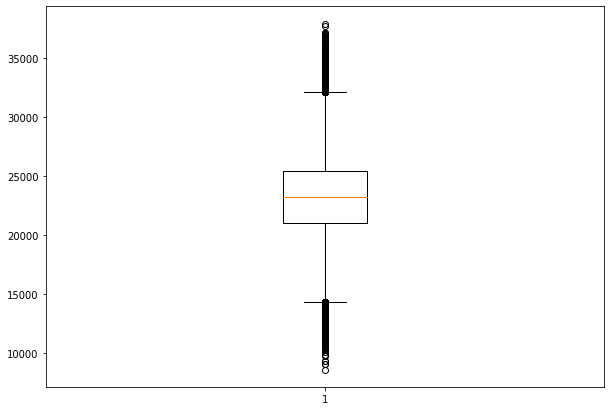

In [110]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
data=np.random.normal(23228,3306,362496)
fig=plt.figure(figsize=(10,7))
plt.boxplot(data)
plt.show()

Como podemos observar en el gráfico, tenemos datos atípicos tanto de ingreso mínimo como máximo. 
No existe una gran brecha entre la media y la mediana de los ingresos totales. Por tal motivo los clientes se clasificarán de acuerdo a su ingreso de la siguente manera: 
1. Bajo: clientes  por debajo del Q1, aproximadamente 21.0000
2. Medio: clientes por ensima de la mediana pero debajo de los 30.000
3. Alto: clientes por ensima de los 30.000


In [111]:


def grupo_ingreso(ingreso):
    if ingreso <= 21000:
        return 'Bajo'
    if ingreso <= 30000:
        return 'Medio'
    return 'Alto'

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Funciona correcto!
</div>

Realizaremos una comprobación al azar de los resultados de la función. Primero con la fila 22 y después verifiando que clasificación de nivel otorgorá la función si los ingresos de un cliente son 12.000

In [112]:
grupo_ingreso(df.loc[22,'total_income'])

'Medio'

In [113]:
print(grupo_ingreso(12000))

Bajo


Los resultados son acordes a los rangos establecidos, por lo que crearemos una nueva columna con estas categorías de ingreso con el nombre: Nivel_ingreso

In [114]:

df['Nivel_ingreso']= df['total_income'].apply(grupo_ingreso)
df['Nivel_ingreso']

0         Alto
1         Bajo
2        Medio
3         Alto
4        Medio
         ...  
21449     Alto
21450    Medio
21451     Bajo
21452     Alto
21453     Bajo
Name: Nivel_ingreso, Length: 21454, dtype: object

A continuación contaremos como estan distribuidos los niveles de ingreso del total de clientes. 

In [116]:

df['Nivel_ingreso'].value_counts()

Bajo     8330
Medio    7205
Alto     5919
Name: Nivel_ingreso, dtype: int64

Para concluir mostraremos el DataFrame con la incusión de las 2 columnas que han sido ya clasificados según los parámetros establcidos, de esta forma permite tener una idea más visual de que variables podemos agrupar para responder las preguntas de hipótesis.

In [117]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categoria_de_edad,Clasificación_propósito,Nivel_ingreso
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49,Property,Alto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39,Car purchase,Bajo
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39,Property,Medio
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39,Education,Alto
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59,Wedding,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,40-49,Property,Alto
21450,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,60-69,Car purchase,Medio
21451,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,30-39,Property,Bajo
21452,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,30-39,Car purchase,Alto


## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

Para responder la primera hipótesis, agruparemos en una sola tabla para conocer la distribución del número de clientes con las 2 variables: número de hijos y si tienen deuda(1) y los que no (0).

In [118]:
pd.crosstab(index=df['children'],
            columns=df['debt'], margins=True)

debt,0,1,All
children,,,
0,13142,1072,14214
1,4364,444,4808
2,1858,194,2052
3,303,27,330
4,37,4,41
5,9,0,9
All,19713,1741,21454


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Bien.
</div>

De acuerdo a los resultados existen más clientes que no tienen hijos y que tampoco han tenido deudas en el pago de un préstamo. Este grupo de 13.142 clientes podrían ser considerados como potenciales, pero podemos complemetarlo con su nivel de ingresos, propósito de su préstamo y estado civil.



Finalmente podemos observar en la siguiente tabla que responde a las tasas de pagar un préstamo a tiempo o no. 

Encontramos que un el 8.11% de los clientes que si han tenido una deuda en el pago de un préstamo tienen de 0 a 4 hijos. Adicional se puede analizar que la tasa de posible incumplimiento es mayor en el segmento de clientes que no tienen hijos, aproximadamente un 5% o 1072 clientes. La explicación se puede deber a que este segmento al no tener hijos pueden endeudarse más y también en periodos atrás quizá sus ingresos no eran lo suficientemente altos, pero ahora que piden el préstamo pudo haber cambiado su posición. 

El pago a tiempo del préstamo depende del número de hijos. Podemos observar que aproximadamente el 92% de los clientes que no tienen hijos podrían pagar a tiempo, pero con  2 hijos la probabildidad de pagar a tiempo se reduce a 89%.

También se ha encontrado un comportamiento en común de los clientes, ha medida que tengan un mayor número de hijos son menos los que piden un préstamo. Ese compartamiento se puede justificar dado que sus gastos van a incrementar en función de sus hijos y reduce la capacidad de pago. 



In [119]:
pd.crosstab(index=df['children'],
            columns=df['debt'], margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

debt,0,1,All
children,,,
0,61.256642,4.996737,66.253379
1,20.341195,2.069544,22.410739
2,8.660390,0.904260,9.564650
3,1.412324,0.125851,1.538175
4,0.172462,0.018645,0.191107
5,0.041950,0.000000,0.041950
All,91.884963,8.115037,100.000000


In [120]:
data_pivot_= df.pivot_table(index=['debt','children'], columns= 'Nivel_ingreso',values='gender',aggfunc='count',margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

data_pivot_

Nivel_ingreso       Alto       Bajo      Medio         All
debt children                                             
0    0         16.677543  24.713340  19.865759   61.256642
     1          5.910320   7.234082   7.196793   20.341195
     2          2.456418   3.220845   2.983127    8.660390
     3          0.466114   0.475436   0.470775    1.412324
     4          0.027967   0.046611   0.097884    0.172462
     5          0.018645   0.013983   0.009322    0.041950
1    0          1.249184   1.962338   1.785215    4.996737
     1          0.540692   0.736459   0.792393    2.069544
     2          0.219073   0.372891   0.312296    0.904260
     3          0.018645   0.046611   0.060595    0.125851
     4          0.004661   0.004661   0.009322    0.018645
All            27.589261  38.827258  33.583481  100.000000

**Conclusión**

Finalmente podemos concluir: 

1. El número de clientes que piden un préstamo va a ir disminuyendo a medida que incremente su número de hijos, existe una relación inversa independientemente si tienen deuda o no.

2. La tasa de cumplimiento a tiempo del pago de un préstamo va a ir disminuyendo a medida que aumente el número de hijos, existe un relación inversa entre ambas variables.

3. El 61% del total de los clientes se encontrarían en tener más probabilidades de pagar a tiempo el préstamo porque no tienen hijos y tampoco tienen deudas. 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>

Buen trabajo.
</div>

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

Para responder la segunda hipótesis, agruparemos en una sola tabla las tasas para conocer si la situación familiar del cliente puede influir a que pague a tiempo su préstamo.

In [121]:
data_pivot1= df.pivot_table(index=['family_status'], columns= 'debt',values='gender',aggfunc='count',margins=True).apply(lambda r: r/len(df) *100, axis=1)

data_pivot1

debt,0,1,All
family_status,,,
civil partnership,17.539853,1.808521,19.348373
divorced,5.173860,0.396197,5.570057
married,53.174233,4.339517,57.513750
unmarried,11.820640,1.277151,13.097791
widow / widower,4.176377,0.293652,4.470029
All,91.884963,8.115037,100.000000


Al revisar nuestra tabla, los clientes que estan casados tiene más probabilidades de cumplir el pago a tiempo. Dado que representa un 53% dentro de la base general que no han tenido incumplimientos. Esta lectura se puede justificar porque su nivel de ingresos familiar va a ser más alto y pueden abonar mayor capital a las cuotas del dividendo. Por el contrario de este mismo grupo de casados un 4% ya han tenido incumplimientos anteriores pero sería un punto a evaluar dependiendo de su nivel de ingresos que tengan para evaluar si su capacidad de pago mejoró.


**Conclusión**

Finalmente podemos concluir: 

1. La situación familiar del cliente influye a que pueda hacer un pago a tiempo. 
2. El segmento de casados representa un grupo potencial para el pago a tiempo del préstamo, esto se podría complementar más dependiendo de su nivel de ingresos. 
3. Los clientes en unión civil y solteros son grupos aproximadamente proporcionales que también registran incumplimiento en los pagos. 



**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

Para encontrar una correlación utilizaremos una gráfica de dispersión entre ambas variables a través de la librería numpy

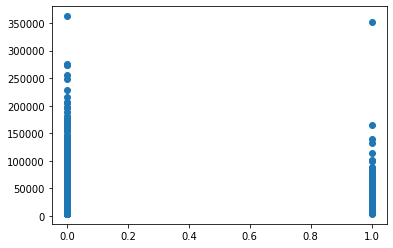

In [122]:
from numpy.random import seed
from numpy.random import randn
seed(1)
x= df['debt']
y= df['total_income']
plt.scatter(x,y)
plt.show()

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> No olvides sobre el nombre para el grafico

Podemos observar que hay una mayor distribución para los clientes que registran mayores niveles de ingreso y que no hay tenido incumplimientos de pago. 
Por el contrario compobamos que los clientes por debajo de 20.000 de ingresos hay tenido incumplimientos de pagos anteriores.

Como siguiente paso comprobaremos los datos del nivel de ingreso y la distribución de incumplimiento o no del crédito.

In [123]:

pd.crosstab(index=df['Nivel_ingreso'],
            columns=df['debt'], margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)


debt,0,1,All
Nivel_ingreso,,,
Alto,25.557006,2.032255,27.589261
Bajo,35.704298,3.122961,38.827258
Medio,30.623660,2.959821,33.583481
All,91.884963,8.115037,100.000000


Podemos obserevar que la tasa de incumplimiento basada en el nivel de ingresos es mayor para los clientes que perciben un salario de clase Bajo, seguido de clase Media y finamente de clase Alta. 
En esta tabla se comprueba que mientras el cliente tenga un nivel económico más alto sus probabilidades de tener incumplimiento en los créditos es menor pero no cero, existe una relación inversa. 

En la siguiente tabla complementaremos este análisis con el género del cliente para examinar cuál género tiene mayores tasas de incumplimiento.

In [124]:
data_pivot3= df.pivot_table(index=['Nivel_ingreso','debt'], columns= 'gender',values='total_income',aggfunc='count')
data_pivot3

gender                 F     M
Nivel_ingreso debt            
Alto          0     3011  2472
              1      198   238
Bajo          0     5885  1775
              1      446   224
Medio         0     4285  2285
              1      350   285

**Conclusión**

Finalmente podemos concluir: 

1. Los clientes que tienen un nivel económico alto tienen menores tasas de incumplimiento en los préstamos.
2. El género femenino que pertence a la clase bajo-medio registra un mayor incumplimiento en los préstamos que el género masculino.
3. Para la clase alta , los clientes del género femenino tienen menores tasas de incumplimiento que los hombres. 
4. La relacion entre ambas variables es inversamente proporcional. 


**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [125]:


pd.crosstab(index=df['Clasificación_propósito'],
            columns=df['debt'], margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

debt,0,1,All
Clasificación_propósito,,,
Car purchase,18.192412,1.878438,20.070849
Education,16.980516,1.724620,18.705137
Property,46.746527,3.645008,50.391535
Wedding,9.965508,0.866971,10.832479
All,91.884963,8.115037,100.000000


Observamos que la tasa de incumplimiento se ve mayormente afectada para aquellos clientes que solicitaron el préstamo para la compra de un bien inmueble, un 3.64% de toda la base en general. 
Esto se puede complementar dado que por lo general el valor de adquisición de deuda es mucho más alto para este tipo de inversiones que cualquiera de las otras opciones. 
Con el objetivo de sacar una conclusión más precisa a continuación añadiremos la distribución de clientes por su nivel de ingreso y categoría de edad.



In [126]:
data_pivot3= df.pivot_table(index=['Clasificación_propósito','debt','categoria_de_edad'], columns= 'Nivel_ingreso',values='total_income',aggfunc='count')
data_pivot3

Nivel_ingreso                                    Alto   Bajo  Medio
Clasificación_propósito debt categoria_de_edad                     
Car purchase            0    19-29              115.0  212.0  196.0
                             30-39              338.0  316.0  349.0
                             40-49              327.0  338.0  351.0
                             50-59              228.0  356.0  286.0
                             60-69               87.0  272.0  102.0
                             70 o más             4.0   17.0    9.0
                        1    19-29               17.0   35.0   24.0
                             30-39               40.0   45.0   51.0
                             40-49               25.0   28.0   41.0
                             50-59               16.0   24.0   25.0
                             60-69                5.0   16.0    7.0
                             70 o más             1.0    3.0    NaN
Education               0    19-29              135.0  211.0  179.0
                             30-39              275.0  301.0  355.0
                             40-49              263.0  322.0  331.0
                             50-59              208.0  341.0  271.0
                             60-69               80.0  229.0  110.0
                             70 o más             2.0   26.0    4.0
                        1    19-29               12.0   35.0   31.0
                             30-39               27.0   48.0   42.0
                             40-49               22.0   33.0   26.0
                             50-59               20.0   22.0   24.0
                             60-69                5.0   16.0    7.0
Property                0    19-29              378.0  548.0  547.0
                             30-39              838.0  888.0  885.0
                             40-49              830.0  830.0  905.0
                             50-59              535.0  901.0  764.0
                             60-69              227.0  657.0  214.0
                             70 o más            14.0   47.0   21.0
                        1    19-29               38.0   60.0   65.0
                             30-39               70.0   82.0   87.0
                             40-49               53.0   68.0   70.0
                             50-59               41.0   49.0   48.0
                             60-69                6.0   25.0   18.0
                             70 o más             1.0    1.0    NaN
Wedding                 0    19-29               84.0  123.0  103.0
                             30-39              166.0  195.0  204.0
                             40-49              184.0  190.0  172.0
                             50-59              115.0  189.0  158.0
                             60-69               47.0  142.0   47.0
                             70 o más             3.0    9.0    7.0
                        1    19-29                4.0   15.0   13.0
                             30-39                8.0   23.0   29.0
                             40-49               14.0   18.0   14.0
                             50-59               10.0   16.0   10.0
                             60-69                1.0    8.0    3.0

**Conclusión**

Finalmente podemos concluir: 
1. El propósito del crédito afecta a que el incumplimiento del préstamo sea mayor si es para adquirir un bien inmueble. 
2. La tasa de incumplimiento fue menor para aquellos clientes que solicitaron el crédito para realizar su boda. 
3. El segmento de clientes que solicitó el crédito para adquirir un bien inmueble, quienes pertenecen a un nivel socio-económico medio y entre las edades de 30-39 años tuvieron el mayor registro de incumplimiento de pago. 


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>


# Conclusión general 


1. Encontramos simetría en el número de valores ausentes tanto de days_employed como en total_income.
2. Las columnas: gender,days_employed,children y education fueron corregidas sus registros dado que presentaban valores problemáticos. La solución que se implementó fue en función de aplicar las funcions de la mediana, dado que encontramos datos muy distantes y atípicos, de esa manera se trató en lo psible de no alterar los datos que fueron modificados.
3. Nuestros datos cambiaron un 1% en la columna children, la columna dob_years fue el que menos cambió por debajo del 1% y la columna dob_years fue la que resultó con un mayor porcentaje de un cambio del 82%.
4. Existieron 71 datos duplicados en el DataFrame que se dieron posiblemente a fallos técnicos en las bases de datos, los mismos que fueron eliminados y actualizados con 21454 filas y 12 columnas.
5. Completamos los valores ausentes de days_employed en función de la mediana del income_type y para la columna total_income se rellenaron en función de las categorías de edad de los clientes. 
6. Clasificamos los datos categóricos de la columna purpose en 5 grupos que abarcaban cada tema en común. Para los datos numéricos lo clasificamos en función de su nivel de ingreso: Bajo, Medio, Alto a través del diagrama de caja. 

Hipótesis: 

7. Comprobamos que si existe una correlación entre el número de hijos y el incumplimiento de un crédito. A medida que los clientes tenían más número de hijos su incapacidad de pago aumentaba. 
8. Evaluamos que la situación familiar influye en el pago del crédito a tiempo. El segmento de clientes que ya estan casados son los que más probabilidades tienen de hacer su pago a tiempo. 
9. Analizamos que si los clientes que tienen un nivel económico alto tienen menores tasas de incumplimiento en los préstamos, como consecuencia el segemento de clientes con un nivel de ingreso bajo son los que registran más incumplimiento. 
10. Obervamos que aquellos clientes que solicitaron el préstamos para adquirir un bien inmueble son los que  registran más incumplimienos de los pagos. Es decir de estos clientes quienes pertenecen a un nivel socio-económico medio y entre las edades de 30-39 años tuvieron el mayor registro de incumplimiento en el pago.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muchas gracias por el trabajo realizado. Tienes el proyecto exelente y está claro que lo estás intentando. Te deje unos comentarios con el color amarillo, te pueden ayudar en el futuro. Todo está bien, estoy lista para aceptar el proyecto :)